# Input

In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import copy

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

filelist = []
for dirname, _, filenames in os.walk('C:/Users/zqzhang.2020/Desktop/algoTerm/code/data'):
    for filename in filenames:
        if filename.endswith(".in"):
            filelist.append(os.path.join(dirname, filename))

for filename in filelist:
    
    print('Process file: ' + filename)

    # Part 0: Reading Input File
    with open(filename, 'r') as data:
        first_line = data.readline()
        rows, cols, num_drones, num_turns, payload = first_line.split()
        rows, cols, num_drones, num_turns, payload = int(rows), int(cols), int(num_drones), int(num_turns), int(payload)
    
        second_line = data.readline()
        num_prodtypes = int(second_line)
        
        third_line = data.readline()
        prodtype_weights = [int(x) for x in third_line.split()]
        
        fourth_line = data.readline()
        num_warehouses = int(fourth_line)
        
        # 2D Array, row = warehouse, col = (x, y) coordinates
        warehouse_locs = []
        # 2D Array, row = warehouse, col = quantity of each prod
        warehouse_prods = []
        for i in range(num_warehouses):
            wh_coords = data.readline()
            warehouse_locs.append([int(x) for x in wh_coords.split()])
            prod_qty = data.readline()
            warehouse_prods.append([int(x) for x in prod_qty.split()])
        
        num_orders = data.readline()
        num_orders = int(num_orders)
        
        # 2D Array, row = order, col = (x, y) coordinates
        order_locs = []
        # 2D Array, row = warehouse, col = quantity of each prod type ordered
        order_prods = []
        for i in range(num_orders):
            order_coords = data.readline()
            order_locs.append([int(x) for x in order_coords.split()])
            num_prods_ordered = data.readline()
            num_prods_ordered = int(num_prods_ordered)
            
            prods_ordered = [0] * num_prodtypes
                        
            prodtype_ordered = data.readline()
            prodtype_ordered = [int(x) for x in prodtype_ordered.split()]
            
            for prodtype in prodtype_ordered:
                prods_ordered[prodtype] += 1
            
            order_prods.append(prods_ordered)
        
        prodtype_weights = np.array(prodtype_weights)
        warehouse_locs = np.array(warehouse_locs)
        warehouse_prods = np.array(warehouse_prods)
        order_locs = np.array(order_locs)
        order_prods = np.array(order_prods)
        
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Process file: C:/Users/zqzhang.2020/Desktop/algoTerm/code/data\busy_day.in


In [7]:
warehouse_locs

array([[113, 179],
       [234, 599],
       [195,  89],
       [215, 207],
       [220, 326],
       [182, 193],
       [ 75, 418],
       [228, 140],
       [310,  26],
       [297, 423]])

In [8]:
order_locs

array([[340, 371],
       [163, 320],
       [201, 331],
       ...,
       [161, 291],
       [127, 152],
       [157, 157]])

# Plot the instance and solutions

In [9]:
# plot the instance

w_x = []
w_y = []
o_x = []
o_y = []

for i in range(len(warehouse_locs)):
    w_x.append(warehouse_locs[i][0])
    w_y.append(warehouse_locs[i][1])
    
for i in range(len(order_locs)):
    o_x.append(order_locs[i][0])
    o_y.append(order_locs[i][1])

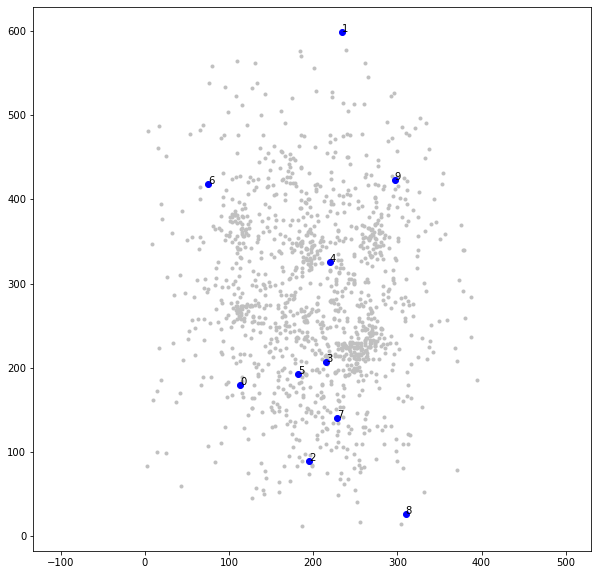

In [10]:
plt.plot(o_x,o_y,'.', color='silver')
plt.plot(w_x,w_y,'bo')

plt.axis('equal')
for i in range(len(w_x)):
    plt.annotate(str(i), xy=(w_x[i],w_y[i]), xytext=(w_x[i],w_y[i])) 


# plt.plot([w_x[0],w_x[5]],[w_y[0],w_y[5]],'b')
# plt.plot([w_x[5],w_x[2]],[w_y[5],w_y[2]],'b')
# plt.plot([w_x[2],w_x[4]],[w_y[2],w_y[4]],'b')
# plt.plot([w_x[4],o_x[11]],[w_y[4],o_y[11]],'r')
# plt.plot([o_x[11],o_x[829]],[o_y[11],o_y[829]],'r')
# plt.plot([o_x[829],o_x[939]],[o_y[829],o_y[939]],'r')
# plt.plot([o_x[939],o_x[464]],[o_y[939],o_y[464]],'r')
# plt.plot([o_x[464],o_x[840]],[o_y[464],o_y[840]],'r')
# plt.plot([o_x[840],o_x[683]],[o_y[840],o_y[683]],'r')
# plt.plot([o_x[683],o_x[889]],[o_y[683],o_y[889]],'r')
# plt.plot([o_x[889],o_x[82]],[o_y[889],o_y[82]],'r')
# plt.plot([o_x[82],o_x[547]],[o_y[82],o_y[547]],'r')



    
fig = plt.gcf()
fig.set_size_inches(10, 10)

In [11]:
drone_route = [
[0, 'L', 0, 299, 1],
[0, 'L', 0, 230, 1],
[0, 'L', 0, 317, 1],
[0, 'L', 0, 255, 1],
[0, 'L', 0, 114, 1],
[0, 'L', 5, 184, 1],
[0, 'L', 5, 364, 1],
[0, 'L', 2, 358, 1],
[0, 'L', 2, 254, 1],
[0, 'L', 4, 162, 1],
[0, 'D', 11, 230, 1],
[0, 'D', 829, 162, 1],
[0, 'D', 939, 317, 1],
[0, 'D', 464, 299, 1],
[0, 'D', 840, 254, 1],
[0, 'D', 840, 364, 1],
[0, 'D', 683, 184, 1], 
[0, 'D', 889, 255, 1],
[0, 'D', 82, 358, 1],
[0, 'D', 547, 114, 1]
]



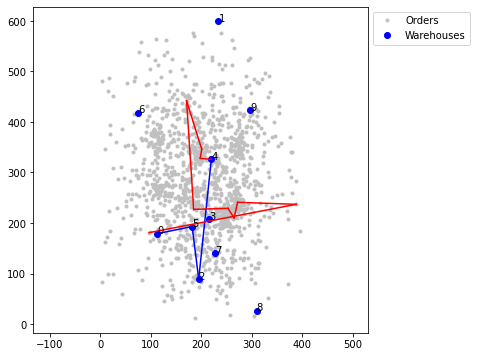

In [13]:
def draw_drone_route(r):
    plt.plot(o_x,o_y,'.', color='silver', label='Orders')
    plt.plot(w_x,w_y,'bo', label='Warehouses')
    
    plt.axis('equal')
    for i in range(len(w_x)):
        plt.annotate(str(i), xy=(w_x[i],w_y[i]), xytext=(w_x[i],w_y[i])) 
    
    bl_b = True
    bl_r = True
    for i in range(len(r)):
#         if bl_b == True:
#             if i < len(r)-1 and r[i][1] == 'L' and r[i+1][1] == 'L':
#                 plt.plot([w_x[r[i][2]],w_x[r[i+1][2]]],[w_y[r[i][2]],w_y[r[i+1][2]]],'b', label='Pickup Routes')
#                 bl_b = False
#             elif i < len(r)-1 and r[i][1] == 'D' and r[i+1][1] == 'L':
#                 plt.plot([o_x[r[i][2]],w_x[r[i+1][2]]],[o_y[r[i][2]],w_y[r[i+1][2]]],'b', label='Pickup Routes')
#                 bl_b = False
            
#         elif bl_r == True:
#             if i < len(r)-1 and r[i][1] == 'L' and r[i+1][1] == 'D':
#                 plt.plot([w_x[r[i][2]],o_x[r[i+1][2]]],[w_y[r[i][2]],o_y[r[i+1][2]]],'r', label='Delivery Routes')
#                 bl_r = False
        
#         else:
            if i < len(r)-1 and r[i][1] == 'L' and r[i+1][1] == 'L':
                plt.plot([w_x[r[i][2]],w_x[r[i+1][2]]],[w_y[r[i][2]],w_y[r[i+1][2]]],'b')
            if i < len(r)-1 and r[i][1] == 'L' and r[i+1][1] == 'D':
                plt.plot([w_x[r[i][2]],o_x[r[i+1][2]]],[w_y[r[i][2]],o_y[r[i+1][2]]],'r')
            if i < len(r)-1 and r[i][1] == 'D' and r[i+1][1] == 'D':
                plt.plot([o_x[r[i][2]],o_x[r[i+1][2]]],[o_y[r[i][2]],o_y[r[i+1][2]]],'r')
            if i < len(r)-1 and r[i][1] == 'D' and r[i+1][1] == 'L':
                plt.plot([o_x[r[i][2]],w_x[r[i+1][2]]],[o_y[r[i][2]],w_y[r[i+1][2]]],'b')
            
    
    
    plt.legend(bbox_to_anchor=(1,1), loc="upper left")
    
    fig = plt.gcf()
    fig.set_size_inches(6, 6)

draw_drone_route(drone_route)

# Local search experiments

## Change the solution from - merge

In [205]:
drone_route = [
[0, 'L', 0, 299, 1],
[0, 'L', 0, 230, 1],
[0, 'L', 0, 317, 1],
[0, 'L', 0, 255, 1],
[0, 'L', 0, 114, 1],
[0, 'L', 5, 184, 1],
[0, 'L', 5, 364, 1],
[0, 'L', 2, 358, 1],
[0, 'L', 2, 254, 1],
[0, 'L', 4, 162, 1],
[0, 'D', 11, 230, 1],
[0, 'D', 829, 162, 1],
[0, 'D', 939, 317, 1],
[0, 'D', 464, 299, 1],
[0, 'D', 840, 254, 1],
[0, 'D', 840, 364, 1],
[0, 'D', 683, 184, 1], 
[0, 'D', 889, 255, 1],
[0, 'D', 82, 358, 1],
[0, 'D', 547, 114, 1]
]


#drone_route = [[15, 'L', 5, 16, 1], [15, 'L', 5, 26, 1], [15, 'L', 8, 41, 1], [15, 'D', 8, 41, 1], [15, 'D', 8, 16, 1], [15, 'D', 8, 26, 1]]

In [206]:
# drone_route -> merged_route
# for the former, it is actually the command for drones
# for the latter, the location index for orders +10 to fit the distance matrix

def dr2mr(r):
    r = r[:]
    r.append(['x','x','x','x','x'])
    sol = []
    loc = -1
    temp_list = []
    prod_list = []
    for i in range(len(r)):
        if r[i][2] != loc or r[i][1] != r[i-1][1]:
            if loc != -1:
                sol.append(copy.deepcopy(temp_list))
                temp_list.clear()
            prod_list.clear()
            prod_list.append((r[i][3],r[i][4]))
            temp_list.append(r[i][0])
            temp_list.append(r[i][1])
            if r[i][1] == 'D':
                temp_list.append(r[i][2]+10)     # for orders +10
            else:
                temp_list.append(r[i][2])    
            temp_list.append(prod_list)
           
            loc = r[i][2]
        else:
            prod_list.append((r[i][3],r[i][4]))
        
    return sol



# merged_route -> drone_route
def mr2dr(r):
    sol = []
    for i in range(len(r)):
        for j in range(len(r[i][3])):
            if r[i][1] == 'L': 
                sol.append([r[i][0], r[i][1],r[i][2],r[i][3][j][0],r[i][3][j][1]])
            else:
                sol.append([r[i][0], r[i][1],r[i][2]-10,r[i][3][j][0],r[i][3][j][1]])
    return sol

In [207]:
drone_route == mr2dr(dr2mr(drone_route))

True

In [208]:
mr = dr2mr(drone_route)
mr

[[0, 'L', 0, [(299, 1), (230, 1), (317, 1), (255, 1), (114, 1)]],
 [0, 'L', 5, [(184, 1), (364, 1)]],
 [0, 'L', 2, [(358, 1), (254, 1)]],
 [0, 'L', 4, [(162, 1)]],
 [0, 'D', 21, [(230, 1)]],
 [0, 'D', 839, [(162, 1)]],
 [0, 'D', 949, [(317, 1)]],
 [0, 'D', 474, [(299, 1)]],
 [0, 'D', 850, [(254, 1), (364, 1)]],
 [0, 'D', 693, [(184, 1)]],
 [0, 'D', 899, [(255, 1)]],
 [0, 'D', 92, [(358, 1)]],
 [0, 'D', 557, [(114, 1)]]]

In [209]:
mr2dr(mr)

[[0, 'L', 0, 299, 1],
 [0, 'L', 0, 230, 1],
 [0, 'L', 0, 317, 1],
 [0, 'L', 0, 255, 1],
 [0, 'L', 0, 114, 1],
 [0, 'L', 5, 184, 1],
 [0, 'L', 5, 364, 1],
 [0, 'L', 2, 358, 1],
 [0, 'L', 2, 254, 1],
 [0, 'L', 4, 162, 1],
 [0, 'D', 11, 230, 1],
 [0, 'D', 829, 162, 1],
 [0, 'D', 939, 317, 1],
 [0, 'D', 464, 299, 1],
 [0, 'D', 840, 254, 1],
 [0, 'D', 840, 364, 1],
 [0, 'D', 683, 184, 1],
 [0, 'D', 889, 255, 1],
 [0, 'D', 82, 358, 1],
 [0, 'D', 547, 114, 1]]

## distance matrix

In [12]:
# coordinates of customers
coordinates = []
for i in range(len(warehouse_locs)):
    coordinates.append(warehouse_locs[i].tolist())
for i in range(len(order_locs)):
    coordinates.append(order_locs[i].tolist())
coordinates=np.array(coordinates)

# computing distance bewteen customers, namely c_ij, 0 is depot
def getdistmat_cij(coordinates):
    num = coordinates.shape[0]
    distmat = np.zeros((num,num))
    
    # computing the distance using L_2norm
    for i in range(num):
        for j in range(i, num):
            distmat[i][j] = distmat[j][i] = \
                      round(np.linalg.norm(coordinates[i] - coordinates[j]),4)
    return distmat
c_ij = getdistmat_cij(coordinates)
c_ij

array([[  0.    , 437.0824, 121.7539, ..., 121.8524,  30.4138,  49.1935],
       [437.0824,   0.    , 511.489 , ..., 316.5328, 459.6281, 448.6569],
       [121.7539, 511.489 ,   0.    , ..., 204.8414,  92.6984,  77.8974],
       ...,
       [121.8524, 316.5328, 204.8414, ...,   0.    , 143.0979, 134.0597],
       [ 30.4138, 459.6281,  92.6984, ..., 143.0979,   0.    ,  30.4138],
       [ 49.1935, 448.6569,  77.8974, ..., 134.0597,  30.4138,   0.    ]])

In [13]:
# wh 0 to custoerm 0
c_ij[0][10+0]

297.3096

In [14]:
# only can be usded to merged route because using c_ij
def getroute_length(r):
    l = 0
    
    for i in range(len(r) - 1):
        l += c_ij[r[i][2]][r[i+1][2]]
    return l

In [80]:
getroute_length(mr)

1304.5931999999998

## 1-opt

In [16]:
# check whether index i can be inserted after index j
def is_insert_feasible(r,i,j):
    dic={}
    if r[i][1]=='D':
        for m in range(len(r[i][3])):
            dic[r[i][3][m][0]]=r[i][3][m][1]*(-1)
        for m in range(j+1):
            for n in range(len(r[m][3])):
                if  r[m][3][n][0] in dic.keys():
                    if r[m][1]=='L':
                        dic[r[m][3][n][0]]+=r[m][3][n][1]
                    else:
                        dic[r[m][3][n][0]]-=r[m][3][n][1]
        if min(dic.values())<0:
            return False
    else:
        for m in range(len(r[i][3])):
            dic[r[i][3][m][0]]=0
        for m in range(j+1):
            if m==i:
                continue
            for n in range(len(r[m][3])):
                if  r[m][3][n][0] in dic.keys():
                    if r[m][1]=='L':
                        dic[r[m][3][n][0]]+=r[m][3][n][1]
                    else:
                        dic[r[m][3][n][0]]-=r[m][3][n][1]
        if min(dic.values())<0:
            return False
    return True       

In [17]:
# calculate the delta distance
def delta_dis(r, i, j):
    if i == 0:
        if j != len(r) - 1:
            return - c_ij[r[i][2]][r[i+1][2]] - c_ij[r[j][2]][r[j+1][2]] + c_ij[r[j][2]][r[i][2]] + c_ij[r[i][2]][r[j+1][2]]
        else:
            return - c_ij[r[i][2]][r[i+1][2]] + c_ij[r[i][2]][r[j][2]]
    elif i != len(r)-1:
        if j != len(r) - 1:
            return - c_ij[r[i-1][2]][r[i][2]] - c_ij[r[i][2]][r[i+1][2]] - c_ij[r[j][2]][r[j+1][2]] + c_ij[r[i-1][2]][r[i+1][2]] + c_ij[r[i][2]][r[j][2]] + c_ij[r[i][2]][r[j+1][2]]
        else:
            return - c_ij[r[i-1][2]][r[i][2]] - c_ij[r[i][2]][r[i+1][2]] + c_ij[r[i][2]][r[j][2]]
    else:
        return - c_ij[r[i-1][2]][r[i][2]] - c_ij[r[j][2]][r[j+1][2]] + c_ij[r[i][2]][r[j][2]] + c_ij[r[j+1][2]][r[i][2]]

In [37]:
# def delta_dis(r, i, j):
#     temp_r = copy.deepcopy(r)
#     temp = r[i]
#     del temp_r[i]
#     if i < j:
#         temp_r.insert(j,temp)
#     else:
#         temp_r.insert(j+1,temp)   
#     return getroute_length(temp_r) - getroute_length(r)
    

In [210]:
# local search by 1-opt with only downhill (better solution)
# time_0_flag = 0 means at time turn 0, do not move location 0

def local_search_1opt(r, time_0_flag = 0):
    for i in range(len(r)):
        for j in range(len(r)):
            if i == j or (time_0_flag == 0 and i == 0):
                continue
            else:
                if is_insert_feasible(r, i, j):
                    if delta_dis(r,i,j) < 0:
                        temp = r[i]
                        del r[i]
                        if i < j:
                            r.insert(j,temp)
                        else:
                            r.insert(j+1,temp)
                        
              

## Converge to local minimum

In [211]:
local_search_1opt(mr)

In [212]:
mr

[[0, 'L', 0, [(299, 1), (230, 1), (317, 1), (255, 1), (114, 1)]],
 [0, 'D', 557, [(114, 1)]],
 [0, 'L', 2, [(358, 1), (254, 1)]],
 [0, 'L', 5, [(184, 1), (364, 1)]],
 [0, 'D', 474, [(299, 1)]],
 [0, 'L', 4, [(162, 1)]],
 [0, 'D', 21, [(230, 1)]],
 [0, 'D', 949, [(317, 1)]],
 [0, 'D', 839, [(162, 1)]],
 [0, 'D', 92, [(358, 1)]],
 [0, 'D', 899, [(255, 1)]],
 [0, 'D', 850, [(254, 1), (364, 1)]],
 [0, 'D', 693, [(184, 1)]]]

In [213]:
getroute_length(mr)

1011.7727

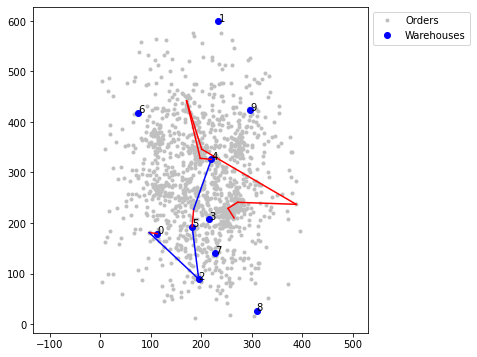

In [214]:
draw_drone_route(mr2dr(mr))

In [216]:
local_search_1opt(mr)
getroute_length(mr)

994.9384

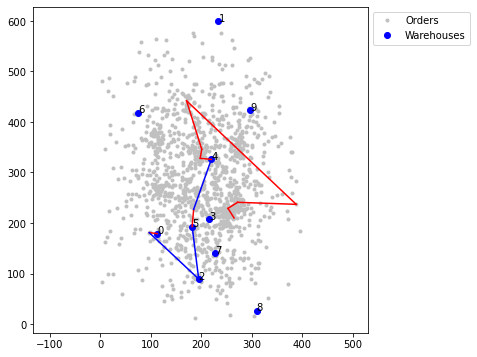

In [217]:
draw_drone_route(mr2dr(mr))

In [218]:
local_search_1opt(mr)
getroute_length(mr)

994.9384

## Metaheuristic

In [229]:
drone_route = [
[0, 'L', 0, 299, 1],
[0, 'L', 0, 230, 1],
[0, 'L', 0, 317, 1],
[0, 'L', 0, 255, 1],
[0, 'L', 0, 114, 1],
[0, 'L', 5, 184, 1],
[0, 'L', 5, 364, 1],
[0, 'L', 2, 358, 1],
[0, 'L', 2, 254, 1],
[0, 'L', 4, 162, 1],
[0, 'D', 11, 230, 1],
[0, 'D', 829, 162, 1],
[0, 'D', 939, 317, 1],
[0, 'D', 464, 299, 1],
[0, 'D', 840, 254, 1],
[0, 'D', 840, 364, 1],
[0, 'D', 683, 184, 1], 
[0, 'D', 889, 255, 1],
[0, 'D', 82, 358, 1],
[0, 'D', 547, 114, 1]
]

mr = dr2mr(drone_route)
getroute_length(mr)

1304.5931999999998

In [230]:
# local search by 1-opt by record-to-record
# time_0_flag = 0 means at time turn 0, do not move location 0

def local_search_1opt(r, time_0_flag = 0):
    for i in range(len(r)):
        for j in range(len(r)):
            if i == j or (time_0_flag == 0 and i == 0):
                continue
            else:
                if is_insert_feasible(r, i, j):
                    if delta_dis(r,i,j) < 0:
                        temp = r[i]
                        del r[i]
                        if i < j:
                            r.insert(j,temp)
                        else:
                            r.insert(j+1,temp)

def r2r(r, time_0_flag = 0):
    BKS = copy.deepcopy(r)
    BKS_value = getroute_length(BKS)
    
    records = BKS_value * 0.01
    
    
    for i in range(len(r)):
        for j in range(len(r)):
            if i == j or (time_0_flag == 0 and i == 0):
                continue
            else:
                if is_insert_feasible(r, i, j):
                    if delta_dis(r,i,j) < 0:
                        temp = r[i]
                        del r[i]
                        if i < j:
                            r.insert(j,temp)
                        else:
                            r.insert(j+1,temp)
                        BKS = r
                        BKS_value = getroute_length(BKS)
                        records = BKS_value * 0.05
                    elif delta_dis(r,i,j) < records:
                        temp = r[i]
                        del r[i]
                        if i < j:
                            r.insert(j,temp)
                        else:
                            r.insert(j+1,temp)
    r = BKS
    
def local_search(r, time_0_flag = 0):
    BKS_Value = getroute_length(r)
    while 1:
        r2r(r)
        local_search_1opt(r)
        current = getroute_length(r)
        delta = BKS_Value - current
        if delta > 0:
            BKS_Value = current
        
        if delta == 0:
            break

In [231]:
local_search(mr)

In [232]:
local_search_1opt(mr)
getroute_length(mr)

858.87

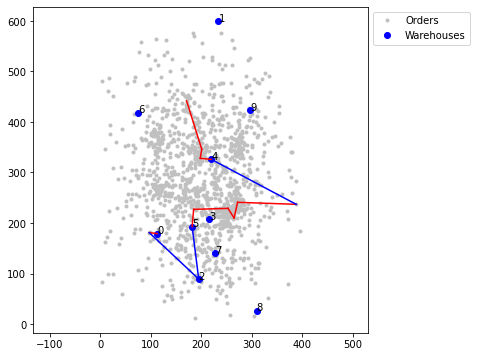

In [233]:
draw_drone_route(mr2dr(mr))

In [234]:
mr2dr(mr)

[[0, 'L', 0, 299, 1],
 [0, 'L', 0, 230, 1],
 [0, 'L', 0, 317, 1],
 [0, 'L', 0, 255, 1],
 [0, 'L', 0, 114, 1],
 [0, 'D', 547, 114, 1],
 [0, 'L', 2, 358, 1],
 [0, 'L', 2, 254, 1],
 [0, 'L', 5, 184, 1],
 [0, 'L', 5, 364, 1],
 [0, 'D', 464, 299, 1],
 [0, 'D', 840, 254, 1],
 [0, 'D', 840, 364, 1],
 [0, 'D', 683, 184, 1],
 [0, 'D', 889, 255, 1],
 [0, 'D', 82, 358, 1],
 [0, 'L', 4, 162, 1],
 [0, 'D', 11, 230, 1],
 [0, 'D', 829, 162, 1],
 [0, 'D', 939, 317, 1]]

In [ ]:
# local search by 1-opt by SA
# time_0_flag = 0 means at time turn 0, do not move location 0

# def local_search_1opt(r, time_0_flag = 0):
#     BKS = copy.deepcopy(r)
#     BKS_value = getroute_length(BKS)
    
#     records = BKS_value * 0.01
    
    
#     for i in range(len(r)):
#         for j in range(len(r)):
#             if i == j or (time_0_flag == 0 and i == 0):
#                 continue
#             else:
#                 if is_insert_feasible(r, i, j):
#                     if delta_dis(r,i,j) < 0:
#                         temp = r[i]
#                         del r[i]
#                         if i < j:
#                             r.insert(j,temp)
#                         else:
#                             r.insert(j+1,temp)
#                         BKS = r
#                         BKS_value = getroute_length(BKS)
#                         records = BKS_value * 0.05
#                     elif delta_dis(r,i,j) < records:
#                         temp = r[i]
#                         del r[i]
#                         if i < j:
#                             r.insert(j,temp)
#                         else:
#                             r.insert(j+1,temp)
#     r = BKS

In [10]:
solution = [] # List of string

# Drone's timing
drone_avail_time = np.array([0] * num_drones)
drone_curr_loc = np.tile(warehouse_locs[0], (num_drones, 1))

skip_counter = 0
# Any drone still available before total number of turns
while (np.any(drone_avail_time < num_turns) and (np.sum(order_prods) > 0)):
    
    # Choose the earliest available drone, skipping those without solutions
    drone_no = np.argsort(drone_avail_time)[skip_counter]
    # No drone to plan anymore
    if drone_avail_time[drone_no] >= num_turns:
        break
    
    print("Planning for drone " + str(drone_no) + " available at time " + str(drone_avail_time[drone_no]))
    
    # Item Planning Phase    
    avail_time = drone_avail_time[drone_no]
    # Record available space in the drone
    avail_space = payload
    # Current drone solution
    drone_solution = []
    
    order_prods_plan = np.copy(order_prods)
    warehouse_prods_plan = np.copy(warehouse_prods)

    # Aggregate weights per order
    order_weights = order_prods_plan * prodtype_weights # 2D matrix, row = order, col = prodtype
    weights_per_order = np.sum(order_weights, axis = 1) # 1D vector, length = number of orders
        
    load_items = dict() # key = prodtype, val = units
    deliver_items = dict() # key = orderNo, val = load_dict
    
    for orderNo in weights_per_order.argsort():
        
        # Filter to the ordered product types
        ordered_prodtypes = np.where(order_prods_plan[orderNo] > 0)[0]
        ordered_prod_unitweight = prodtype_weights[ordered_prodtypes]
                
        # Heaviest item first
        for idx in ordered_prod_unitweight.argsort()[::-1]:
            
            # If available space is less than the unit weight of this product
            if avail_space < ordered_prod_unitweight[idx]:
                break
            
            units_to_load = avail_space // ordered_prod_unitweight[idx]
            
            if units_to_load > order_prods_plan[orderNo, ordered_prodtypes[idx]]:
                units_to_load = order_prods_plan[orderNo, ordered_prodtypes[idx]]
                order_prods_plan[orderNo, ordered_prodtypes[idx]] = 0
            else:
                order_prods_plan[orderNo, ordered_prodtypes[idx]] -= units_to_load
            
            avail_space -= (units_to_load * ordered_prod_unitweight[idx])
            
            if units_to_load > 0:
                if orderNo in deliver_items:
                    if ordered_prodtypes[idx] in deliver_items[orderNo]:
                        deliver_items[orderNo][ordered_prodtypes[idx]] += units_to_load
                    else:
                        deliver_items[orderNo][ordered_prodtypes[idx]] = units_to_load
                else:
                    deliver_items[orderNo] = {ordered_prodtypes[idx]: units_to_load}
                
                if ordered_prodtypes[idx] in load_items:
                    load_items[ordered_prodtypes[idx]] += units_to_load
                else:
                    load_items[ordered_prodtypes[idx]] = units_to_load
    
    # Warehouse route planning
    drone_loc_plan = drone_curr_loc[drone_no]
    
    while ((len(load_items) > 0) and (avail_time < num_turns)):
        # Distance from drone to warehouse
        dist_warehouse = np.linalg.norm(warehouse_locs - drone_loc_plan, 2, axis = 1)
        
        for warehouse_id in dist_warehouse.argsort():
            # Available product types in this warehouse
            warehouse_avail_prods = np.where(warehouse_prods_plan[warehouse_id] > 0)[0]
            # Remaining product types to load
            target_items = np.array(list(load_items.keys()))
            
            warehouse_load_prodtypes = target_items[np.in1d(target_items, warehouse_avail_prods)]
            
            if len(warehouse_load_prodtypes) > 0:
                
                for prodtype in warehouse_load_prodtypes:
                    
                    # Load minimum of the required number and available number in the warehouse
                    load_num_units = min(load_items[prodtype], warehouse_prods_plan[warehouse_id, prodtype])
                    
                    load_items[prodtype] -= load_num_units
                    if load_items[prodtype] == 0:
                        del load_items[prodtype]
                    
                    warehouse_prods_plan[warehouse_id, prodtype] -= load_num_units
                    
                    avail_time += (np.ceil(dist_warehouse[warehouse_id]) + 1)
                    drone_loc_plan = warehouse_locs[warehouse_id]
                    
                    drone_solution.append(str(drone_no) + " L " + str(warehouse_id) + " " + str(prodtype) + " " + str(load_num_units))
                
                break # Break, have to recalculate distance
    
    # Customer delivery route planning
    while ((len(deliver_items) > 0) and (avail_time < num_turns)):
        
        cust_order_no = np.array(list(deliver_items.keys()))
        cust_order_locs = order_locs[cust_order_no]
        
        # Distance from drone to customers
        dist_cust = np.linalg.norm(cust_order_locs - drone_loc_plan, 2, axis = 1)
        
        # Go to nearest order for delivery
        delivery_cust_idx = dist_cust.argmin()
        delivery_order_no = cust_order_no[delivery_cust_idx]
        
        for prodtype, units in deliver_items[delivery_order_no].items():
            
            avail_time += (np.ceil(dist_cust[delivery_cust_idx]) + 1)
            drone_loc_plan = cust_order_locs[delivery_cust_idx]
            
            drone_solution.append(str(drone_no) + " D " + str(delivery_order_no) + " " + str(prodtype) + " " + str(units))
        
        del deliver_items[delivery_order_no]
    
    if avail_time <= num_turns:
        #print("soln found")
        solution += drone_solution
        drone_curr_loc[drone_no] = drone_loc_plan
        drone_avail_time[drone_no] = avail_time        
        # Persist np arrays
        order_prods = order_prods_plan
        warehouse_prods = warehouse_prods_plan
        # Counter to keep track how many rounds of no solution found
        skip_counter = 0
    else:        
        skip_counter += 1

if (np.sum(order_prods) > 0):
    wait_drones = np.where(drone_avail_time < num_turns)[0]
    for wait_drone in wait_drones:
        solution.append(str(wait_drone) + " W " + str(num_turns - drone_avail_time[wait_drone]))

    drone_avail_time[wait_drones] = num_turns

Planning for drone 0 available at time 0
Planning for drone 14 available at time 0
Planning for drone 29 available at time 0
Planning for drone 13 available at time 0
Planning for drone 27 available at time 0
Planning for drone 26 available at time 0
Planning for drone 12 available at time 0
Planning for drone 25 available at time 0
Planning for drone 24 available at time 0
Planning for drone 11 available at time 0
Planning for drone 22 available at time 0
Planning for drone 10 available at time 0
Planning for drone 21 available at time 0
Planning for drone 20 available at time 0
Planning for drone 9 available at time 0
Planning for drone 19 available at time 0
Planning for drone 8 available at time 0
Planning for drone 17 available at time 0
Planning for drone 18 available at time 0
Planning for drone 16 available at time 0
Planning for drone 1 available at time 0
Planning for drone 2 available at time 0
Planning for drone 15 available at time 0
Planning for drone 28 available at time

Planning for drone 18 available at time 5603
Planning for drone 17 available at time 5606
Planning for drone 8 available at time 5657
Planning for drone 0 available at time 5679
Planning for drone 23 available at time 5769
Planning for drone 11 available at time 5772
Planning for drone 10 available at time 5825
Planning for drone 15 available at time 5848
Planning for drone 16 available at time 5860
Planning for drone 26 available at time 5872
Planning for drone 29 available at time 5894
Planning for drone 14 available at time 5906
Planning for drone 19 available at time 5916
Planning for drone 3 available at time 5945
Planning for drone 4 available at time 6043
Planning for drone 27 available at time 6084
Planning for drone 6 available at time 6110
Planning for drone 24 available at time 6118
Planning for drone 2 available at time 6121
Planning for drone 9 available at time 6155
Planning for drone 28 available at time 6155
Planning for drone 5 available at time 6184
Planning for drone

Planning for drone 16 available at time 11221
Planning for drone 6 available at time 11233
Planning for drone 2 available at time 11284
Planning for drone 1 available at time 11291
Planning for drone 4 available at time 11306
Planning for drone 18 available at time 11316
Planning for drone 10 available at time 11413
Planning for drone 3 available at time 11424
Planning for drone 25 available at time 11468
Planning for drone 9 available at time 11530
Planning for drone 0 available at time 11563
Planning for drone 19 available at time 11577
Planning for drone 11 available at time 11611
Planning for drone 26 available at time 11681
Planning for drone 8 available at time 11702
Planning for drone 24 available at time 11739
Planning for drone 12 available at time 11744
Planning for drone 21 available at time 11751
Planning for drone 17 available at time 11816
Planning for drone 20 available at time 11867
Planning for drone 28 available at time 11900
Planning for drone 16 available at time 11

Planning for drone 5 available at time 17507
Planning for drone 20 available at time 17548
Planning for drone 7 available at time 17553
Planning for drone 17 available at time 17572
Planning for drone 13 available at time 17674
Planning for drone 16 available at time 17790
Planning for drone 22 available at time 17802
Planning for drone 3 available at time 17851
Planning for drone 14 available at time 17856
Planning for drone 2 available at time 17908
Planning for drone 21 available at time 17932
Planning for drone 27 available at time 17940
Planning for drone 19 available at time 17986
Planning for drone 0 available at time 18023
Planning for drone 1 available at time 18034
Planning for drone 24 available at time 18123
Planning for drone 27 available at time 18184
Planning for drone 29 available at time 18228
Planning for drone 19 available at time 18263
Planning for drone 7 available at time 18270
Planning for drone 20 available at time 18299
Planning for drone 15 available at time 1

Planning for drone 8 available at time 23296
Planning for drone 7 available at time 23329
Planning for drone 19 available at time 23347
Planning for drone 10 available at time 23482
Planning for drone 0 available at time 23499
Planning for drone 18 available at time 23504
Planning for drone 21 available at time 23574
Planning for drone 29 available at time 23608
Planning for drone 3 available at time 23636
Planning for drone 4 available at time 23646
Planning for drone 6 available at time 23666
Planning for drone 16 available at time 23668
Planning for drone 17 available at time 23807
Planning for drone 25 available at time 23826
Planning for drone 12 available at time 23834
Planning for drone 2 available at time 23879
Planning for drone 28 available at time 23885
Planning for drone 29 available at time 23896
Planning for drone 1 available at time 23910
Planning for drone 26 available at time 23927
Planning for drone 3 available at time 23945
Planning for drone 19 available at time 240

Planning for drone 9 available at time 29076
Planning for drone 23 available at time 29092
Planning for drone 5 available at time 29125
Planning for drone 25 available at time 29129
Planning for drone 18 available at time 29130
Planning for drone 0 available at time 29156
Planning for drone 10 available at time 29233
Planning for drone 15 available at time 29241
Planning for drone 27 available at time 29252
Planning for drone 27 available at time 29332
Planning for drone 19 available at time 29409
Planning for drone 8 available at time 29412
Planning for drone 9 available at time 29471
Planning for drone 29 available at time 29521
Planning for drone 4 available at time 29537
Planning for drone 1 available at time 29541
Planning for drone 27 available at time 29550
Planning for drone 21 available at time 29568
Planning for drone 17 available at time 29582
Planning for drone 26 available at time 29607
Planning for drone 23 available at time 29635
Planning for drone 3 available at time 29

Planning for drone 13 available at time 34816
Planning for drone 25 available at time 34842
Planning for drone 7 available at time 34870
Planning for drone 20 available at time 34880
Planning for drone 6 available at time 34928
Planning for drone 4 available at time 34952
Planning for drone 14 available at time 34999
Planning for drone 0 available at time 35053
Planning for drone 9 available at time 35121
Planning for drone 10 available at time 35150
Planning for drone 23 available at time 35153
Planning for drone 2 available at time 35204
Planning for drone 22 available at time 35209
Planning for drone 1 available at time 35261
Planning for drone 28 available at time 35276
Planning for drone 14 available at time 35280
Planning for drone 19 available at time 35309
Planning for drone 8 available at time 35408
Planning for drone 11 available at time 35416
Planning for drone 5 available at time 35508
Planning for drone 18 available at time 35578
Planning for drone 0 available at time 3559

Planning for drone 8 available at time 40267
Planning for drone 9 available at time 40283
Planning for drone 7 available at time 40313
Planning for drone 16 available at time 40317
Planning for drone 22 available at time 40404
Planning for drone 12 available at time 40423
Planning for drone 17 available at time 40441
Planning for drone 24 available at time 40453
Planning for drone 14 available at time 40467
Planning for drone 23 available at time 40478
Planning for drone 1 available at time 40492
Planning for drone 27 available at time 40529
Planning for drone 6 available at time 40551
Planning for drone 0 available at time 40586
Planning for drone 8 available at time 40604
Planning for drone 13 available at time 40661
Planning for drone 7 available at time 40681
Planning for drone 6 available at time 40693
Planning for drone 9 available at time 40737
Planning for drone 23 available at time 40743
Planning for drone 3 available at time 40788
Planning for drone 13 available at time 40861

Planning for drone 12 available at time 45894
Planning for drone 6 available at time 45904
Planning for drone 7 available at time 45908
Planning for drone 3 available at time 45909
Planning for drone 10 available at time 45946
Planning for drone 2 available at time 45974
Planning for drone 20 available at time 46034
Planning for drone 28 available at time 46079
Planning for drone 27 available at time 46080
Planning for drone 5 available at time 46081
Planning for drone 29 available at time 46087
Planning for drone 2 available at time 46099
Planning for drone 18 available at time 46133
Planning for drone 9 available at time 46181
Planning for drone 24 available at time 46213
Planning for drone 12 available at time 46222
Planning for drone 8 available at time 46225
Planning for drone 25 available at time 46225
Planning for drone 16 available at time 46301
Planning for drone 23 available at time 46315
Planning for drone 13 available at time 46352
Planning for drone 12 available at time 46

Planning for drone 0 available at time 51240
Planning for drone 24 available at time 51260
Planning for drone 11 available at time 51265
Planning for drone 14 available at time 51268
Planning for drone 21 available at time 51281
Planning for drone 6 available at time 51285
Planning for drone 12 available at time 51355
Planning for drone 25 available at time 51443
Planning for drone 0 available at time 51477
Planning for drone 27 available at time 51493
Planning for drone 1 available at time 51520
Planning for drone 13 available at time 51534
Planning for drone 8 available at time 51582
Planning for drone 24 available at time 51583
Planning for drone 25 available at time 51600
Planning for drone 23 available at time 51602
Planning for drone 17 available at time 51627
Planning for drone 3 available at time 51636
Planning for drone 10 available at time 51665
Planning for drone 20 available at time 51699
Planning for drone 19 available at time 51769
Planning for drone 0 available at time 5

Planning for drone 0 available at time 56718
Planning for drone 20 available at time 56749
Planning for drone 7 available at time 56789
Planning for drone 15 available at time 56842
Planning for drone 25 available at time 56857
Planning for drone 21 available at time 56863
Planning for drone 27 available at time 56892
Planning for drone 23 available at time 56910
Planning for drone 2 available at time 56911
Planning for drone 22 available at time 56926
Planning for drone 16 available at time 56932
Planning for drone 29 available at time 57002
Planning for drone 18 available at time 57015
Planning for drone 13 available at time 57115
Planning for drone 15 available at time 57148
Planning for drone 19 available at time 57214
Planning for drone 4 available at time 57267
Planning for drone 28 available at time 57293
Planning for drone 18 available at time 57297
Planning for drone 14 available at time 57317
Planning for drone 6 available at time 57351
Planning for drone 16 available at time

Planning for drone 0 available at time 61601
Planning for drone 18 available at time 61603
Planning for drone 11 available at time 61652
Planning for drone 12 available at time 61755
Planning for drone 19 available at time 61801
Planning for drone 24 available at time 61860
Planning for drone 2 available at time 61935
Planning for drone 10 available at time 61958
Planning for drone 5 available at time 61997
Planning for drone 24 available at time 62034
Planning for drone 27 available at time 62056
Planning for drone 29 available at time 62081
Planning for drone 28 available at time 62091
Planning for drone 1 available at time 62128
Planning for drone 6 available at time 62149
Planning for drone 4 available at time 62151
Planning for drone 21 available at time 62170
Planning for drone 14 available at time 62225
Planning for drone 10 available at time 62236
Planning for drone 2 available at time 62265
Planning for drone 28 available at time 62284
Planning for drone 16 available at time 6

Planning for drone 11 available at time 66563
Planning for drone 27 available at time 66574
Planning for drone 22 available at time 66596
Planning for drone 3 available at time 66645
Planning for drone 25 available at time 66677
Planning for drone 5 available at time 66697
Planning for drone 8 available at time 66758
Planning for drone 9 available at time 66785
Planning for drone 4 available at time 66801
Planning for drone 23 available at time 66835
Planning for drone 16 available at time 66873
Planning for drone 1 available at time 66919
Planning for drone 18 available at time 66985
Planning for drone 17 available at time 67001
Planning for drone 26 available at time 67006
Planning for drone 3 available at time 67027
Planning for drone 19 available at time 67027
Planning for drone 25 available at time 67029
Planning for drone 29 available at time 67033
Planning for drone 21 available at time 67062
Planning for drone 20 available at time 67073
Planning for drone 15 available at time 6

Planning for drone 11 available at time 71248
Planning for drone 4 available at time 71253
Planning for drone 25 available at time 71307
Planning for drone 12 available at time 71310
Planning for drone 23 available at time 71314
Planning for drone 18 available at time 71407
Planning for drone 4 available at time 71437
Planning for drone 21 available at time 71455
Planning for drone 1 available at time 71462
Planning for drone 15 available at time 71485
Planning for drone 28 available at time 71533
Planning for drone 26 available at time 71544
Planning for drone 10 available at time 71558
Planning for drone 13 available at time 71634
Planning for drone 9 available at time 71686
Planning for drone 4 available at time 71699
Planning for drone 28 available at time 71699
Planning for drone 5 available at time 71704
Planning for drone 24 available at time 71718
Planning for drone 3 available at time 71732
Planning for drone 11 available at time 71746
Planning for drone 14 available at time 7

Planning for drone 3 available at time 76022
Planning for drone 18 available at time 76026
Planning for drone 20 available at time 76028
Planning for drone 15 available at time 76066
Planning for drone 21 available at time 76087
Planning for drone 19 available at time 76111
Planning for drone 7 available at time 76175
Planning for drone 13 available at time 76183
Planning for drone 18 available at time 76189
Planning for drone 20 available at time 76205
Planning for drone 15 available at time 76235
Planning for drone 17 available at time 76258
Planning for drone 11 available at time 76281
Planning for drone 28 available at time 76295
Planning for drone 16 available at time 76296
Planning for drone 23 available at time 76317
Planning for drone 20 available at time 76332
Planning for drone 24 available at time 76334
Planning for drone 6 available at time 76334
Planning for drone 29 available at time 76348
Planning for drone 21 available at time 76363
Planning for drone 16 available at ti

Planning for drone 9 available at time 80609
Planning for drone 13 available at time 80629
Planning for drone 19 available at time 80639
Planning for drone 15 available at time 80746
Planning for drone 29 available at time 80794
Planning for drone 25 available at time 80796
Planning for drone 17 available at time 80840
Planning for drone 0 available at time 80841
Planning for drone 2 available at time 80853
Planning for drone 15 available at time 80858
Planning for drone 22 available at time 80887
Planning for drone 10 available at time 80897
Planning for drone 1 available at time 80925
Planning for drone 27 available at time 80931
Planning for drone 18 available at time 81008
Planning for drone 20 available at time 81048
Planning for drone 9 available at time 81059
Planning for drone 29 available at time 81105
Planning for drone 1 available at time 81105
Planning for drone 25 available at time 81107
Planning for drone 11 available at time 81137
Planning for drone 15 available at time 

Planning for drone 4 available at time 85350
Planning for drone 19 available at time 85400
Planning for drone 23 available at time 85425
Planning for drone 18 available at time 85454
Planning for drone 29 available at time 85477
Planning for drone 16 available at time 85534
Planning for drone 0 available at time 85542
Planning for drone 26 available at time 85549
Planning for drone 19 available at time 85581
Planning for drone 1 available at time 85587
Planning for drone 25 available at time 85621
Planning for drone 20 available at time 85647
Planning for drone 9 available at time 85665
Planning for drone 12 available at time 85749
Planning for drone 19 available at time 85756
Planning for drone 0 available at time 85768
Planning for drone 22 available at time 85782
Planning for drone 7 available at time 85868
Planning for drone 19 available at time 85915
Planning for drone 0 available at time 85928
Planning for drone 12 available at time 85936
Planning for drone 11 available at time 8

Planning for drone 2 available at time 90178
Planning for drone 21 available at time 90215
Planning for drone 3 available at time 90237
Planning for drone 9 available at time 90245
Planning for drone 14 available at time 90274
Planning for drone 7 available at time 90337
Planning for drone 20 available at time 90378
Planning for drone 2 available at time 90385
Planning for drone 26 available at time 90406
Planning for drone 19 available at time 90416
Planning for drone 17 available at time 90416
Planning for drone 10 available at time 90429
Planning for drone 21 available at time 90454
Planning for drone 23 available at time 90483
Planning for drone 0 available at time 90541
Planning for drone 15 available at time 90594
Planning for drone 28 available at time 90596
Planning for drone 25 available at time 90600
Planning for drone 2 available at time 90635
Planning for drone 26 available at time 90684
Planning for drone 29 available at time 90729
Planning for drone 1 available at time 90

Planning for drone 6 available at time 95107
Planning for drone 5 available at time 95180
Planning for drone 1 available at time 95194
Planning for drone 9 available at time 95243
Planning for drone 20 available at time 95301
Planning for drone 17 available at time 95310
Planning for drone 19 available at time 95355
Planning for drone 7 available at time 95377
Planning for drone 4 available at time 95497
Planning for drone 16 available at time 95519
Planning for drone 28 available at time 95527
Planning for drone 10 available at time 95546
Planning for drone 9 available at time 95568
Planning for drone 12 available at time 95596
Planning for drone 27 available at time 95600
Planning for drone 11 available at time 95604
Planning for drone 15 available at time 95616
Planning for drone 26 available at time 95640
Planning for drone 21 available at time 95704
Planning for drone 3 available at time 95706
Planning for drone 28 available at time 95731
Planning for drone 10 available at time 95

Planning for drone 25 available at time 100109
Planning for drone 21 available at time 100186
Planning for drone 6 available at time 100196
Planning for drone 10 available at time 100228
Planning for drone 28 available at time 100260
Planning for drone 16 available at time 100275
Planning for drone 26 available at time 100277
Planning for drone 4 available at time 100296
Planning for drone 24 available at time 100379
Planning for drone 13 available at time 100388
Planning for drone 23 available at time 100393
Planning for drone 21 available at time 100421
Planning for drone 12 available at time 100446
Planning for drone 25 available at time 100449
Planning for drone 22 available at time 100465
Planning for drone 0 available at time 100504
Planning for drone 9 available at time 100510
Planning for drone 8 available at time 100527
Planning for drone 7 available at time 100563
Planning for drone 27 available at time 100610
Planning for drone 6 available at time 100615
Planning for drone 1

In [11]:
with open('C:/Users/zqzhang.2020/Desktop/algoTerm/code/output.txt', 'w') as fd:
    fd.write(str(len(solution)) + '\n')
    for writeLine in solution:
        fd.write(writeLine + '\n')